In [1]:
from core.TrajectoryDF import NumPandasTraj as TrajDF
from features.spatial_features import SpatialFeatures as spatial
from features.temporal_features import TemporalFeatures as temporal
import matplotlib.pyplot as plt
from preprocessing.interpolation import Interpolation as ip
from preprocessing.filters import Filters as filt
from utilities.conversions import Conversions as con

import utilities.constants as const
import pandas as pd
from scipy.interpolate import CubicSpline, interp2d
import numpy as np

In [2]:
%%time

# atlantic = pd.read_csv('./data/atlantic.csv')
# atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
# def convert_to_datetime(row):
#         this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
#         this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
#         return '{} {}'.format(this_date, this_time)
# atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
# sample = TrajDF(atlantic,
#                          latitude='Latitude',
#                          longitude='Longitude',
#                          datetime='DateTime',
#                          traj_id='ID',
#                          rest_of_columns=[])
gulls = pd.read_csv('./data/gulls.csv')
sample = TrajDF(gulls,
                latitude='location-lat',
                longitude='location-long',
                datetime='timestamp',
                traj_id='tag-local-identifier',
                rest_of_columns=[])
# rf = pd.read_csv('./data/geolife_sample.csv')
# sample = TrajDF(rf, 'lat', 'lon', 'datetime', 'id')

CPU times: user 434 ms, sys: 20.3 ms, total: 455 ms
Wall time: 453 ms


In [3]:
%%time

linear = ip.interpolate_position(dataframe=sample.reset_index(),
                                time_jump=3600*4)
print(f"Original DF length: {len(sample)}")
print(f"Linear Original DF length: {len(linear)}")

Process Process-8:
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/yjharanwala/anaconda3/envs/PreprocessingLibrary/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 2895, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1675, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1683, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'DateTime'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/yjharanwala/anaconda3/envs/PreprocessingLibrary/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/yjharanwala/anac

ValueError: No objects to concatenate

In [4]:
%%time

cubic = ip.interpolate_position(dataframe=sample,
                                time_jump=3600*4,
                                ip_type='cubic')
print(f"Original DF length: {len(sample)}")
print(f"Cubic Interpolated DF length: {len(cubic)}")

ValueError: No objects to concatenate

NameError: name 'linear' is not defined

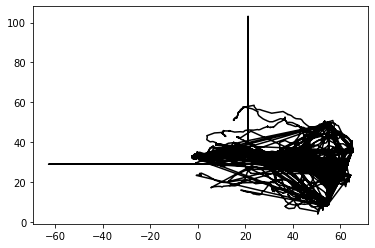

In [5]:
plt.plot(sample[const.LAT],sample[const.LONG], color='black'),
plt.plot(linear[const.LAT], linear[const.LONG], color='orange'),
plt.plot(cubic[const.LAT], cubic[const.LONG], color='purple')

plt.legend(['original', 'linear', 'cubic'])
plt.show()

In [ ]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))


ax1.plot(sample[const.LAT], sample[const.LONG], color='black')
ax1.legend(['Original'])
ax2.plot(linear[const.LAT], linear[const.LONG], color='red')
ax2.legend(['Linear'])
ax3.plot(cubic[const.LAT], cubic[const.LONG], color='blue')
ax3.legend(['Cubic'])
plt.tight_layout()

In [ ]:
linear.head(10)

In [ ]:
sample.head(10)

In [6]:
small = sample.reset_index().loc[sample.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
a = small.reset_index()[const.DateTime].diff().dt.total_seconds()
(a > 3600*4).value_counts()
small.head()

,traj_id,DateTime,lat,lon
0,91732,2009-05-27 14:00:00,61.24783,24.58617
1,91732,2009-05-27 20:00:00,61.23267,24.58217
2,91732,2009-05-28 05:00:00,61.18833,24.53133
3,91732,2009-05-28 08:00:00,61.23283,24.58200
4,91732,2009-05-28 14:00:00,61.23267,24.58250


In [7]:
very_small = ip.linear_help(small, '91732', 3600*4)

ValueError: cannot set a row with mismatched columns